**Credit Card fraud detection with RandomForetClassifier**
------------------------------------------------------------------------

The objective of this notebook is to predict as many fraudulent transactions as possible. This notebook uses sci-kit RandomForestClassifier to predict fraudulent transactions.  

In [1]:
import numpy as np 
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
#main_df=pd.read_csv("creditcard.csv")
main_df=pd.read_csv("data/creditcard.csv")
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 

**Balancing data**

In [4]:
fraud_raw = main_df[main_df['Class'] == 1]
normal_raw = main_df[main_df['Class'] == 0]
print (fraud_raw.shape, normal_raw.shape)

# Undersample the normal transactions
percentage = len(fraud_raw)/float(len(normal_raw))
print (percentage)
normal = normal_raw.sample(frac=percentage)
fraud = fraud_raw
cc_data = fraud.append(normal)

print ("Percentage of normal transactions                 :", len(normal) / float(len(cc_data)))
print ("Percentage of fraudulent trasactions                :", len(fraud_raw) / float(len(cc_data)))
print ("Total number of transactions in our new dataset :", len(cc_data))

(492, 31) (284315, 31)
0.0017304750013189597
Percentage of normal transactions                 : 0.5
Percentage of fraudulent trasactions                : 0.5
Total number of transactions in our new dataset : 984


             precision    recall  f1-score   support

        0.0       0.90      0.98      0.94       151
        1.0       0.98      0.88      0.93       145

avg / total       0.94      0.93      0.93       296



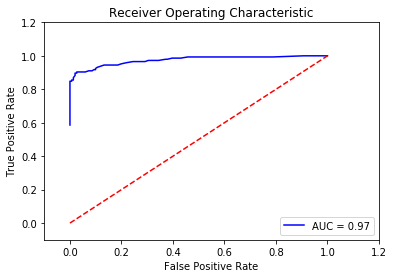

In [11]:
reg_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
train_data,test_data = train_test_split(cc_data,test_size=0.30)
train_matrix = train_data.as_matrix()
x = train_matrix[:,range(0,class_index-1)]
y = train_matrix[:,class_index]
reg_model = reg_model.fit(x,y)

test_matrix =test_data.as_matrix()
test_x = test_matrix[:,range(0,class_index-1)]
test_y = test_matrix[:,class_index]

predicted = reg_model.predict(test_x)
predicted_proba = reg_model.predict_proba(test_x)

print(metrics.classification_report(test_y, predicted))
#print(metrics.confusion_matrix(test_y, predicted))
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, predicted_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)
#print('AUC = %0.4f'% roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Acknowledgement**
---------------

I would like to acknowldge kanishkapsingh notebook, which gave me some insights on how to approach this problem: https://www.kaggle.com/kanishkapsingh2/d/dalpozz/creditcardfraud/naive-bayes-80-actual-fraud-detection
This introduction to ROC curves also helped my understand how to interpret and test my results https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/

0
